#Tugas WGTIK Pertemuan ke-8

#Waktu: Sabtu, 24 April 2021, 09:30-11:30
#Pembicara: M. Yuslan Abu Bakar, M.Kom.

**NAMA:  Fiky Anggara**

**NIM:  (1303180015)**

**KELAS: IT-43-0342**

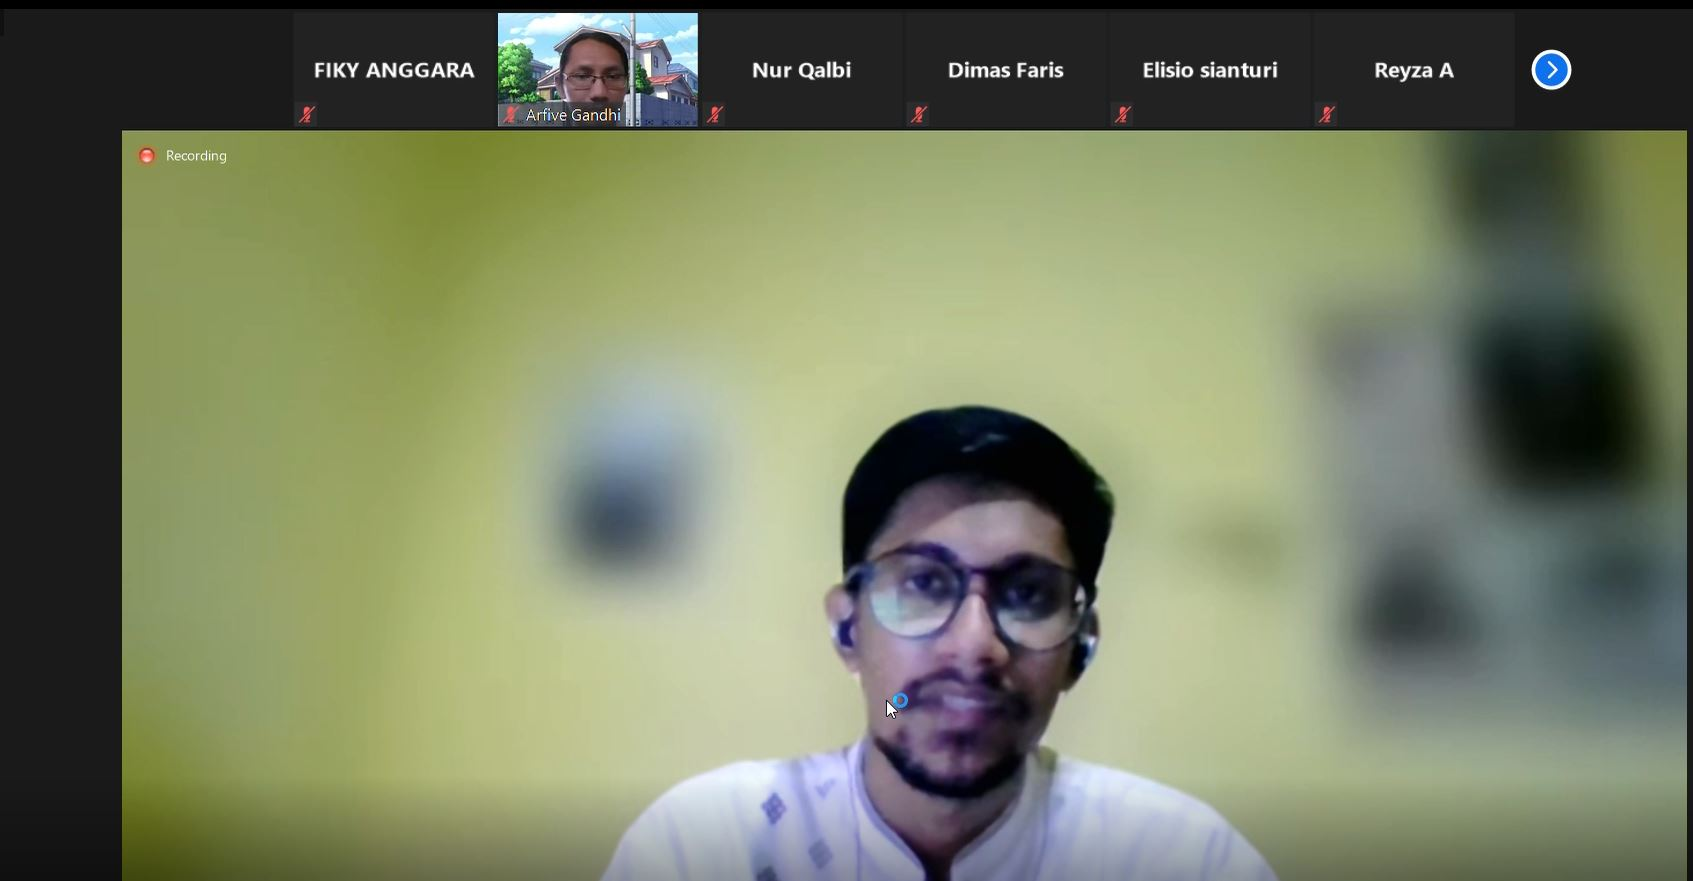

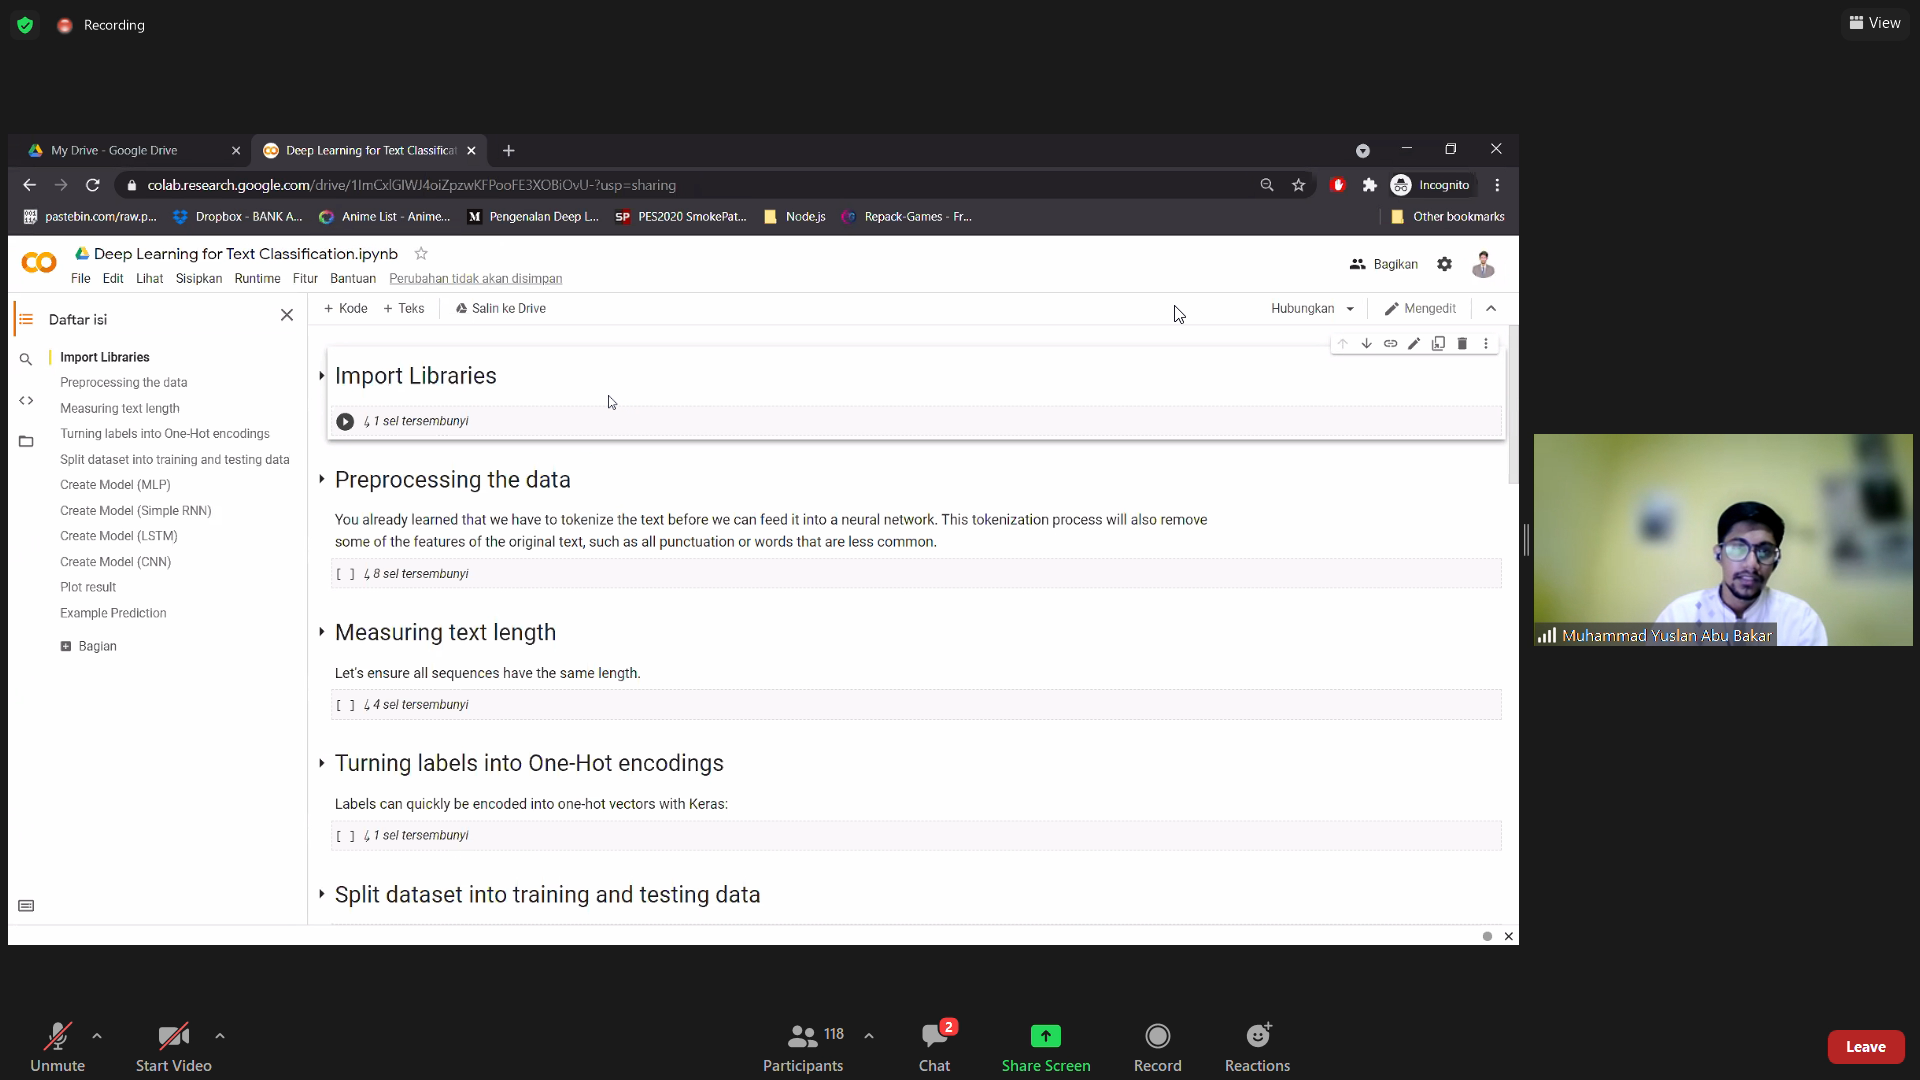

# Import Libraries

In [ ]:
import numpy as np
from keras.layers import Activation, Conv1D, Dense, Embedding, Flatten, Input, MaxPooling1D, SimpleRNN
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.metrics import categorical_accuracy
import tensorflow_datasets as tfds

# Preprocessing the data
You already learned that we have to tokenize the text before we can feed it into a neural network. This tokenization process will also remove some of the features of the original text, such as all punctuation or words that are less common.

**Below is the AG News Dataset, which contains 120,000 dataset and 4 classes**

In [ ]:
dataset = tfds.load('ag_news_subset', split='train', shuffle_files=True)

texts, target = [], []
for example in dataset:
  texts.append(example["description"].numpy().decode('utf-8'))
  target.append(example["label"].numpy())

target_names = ['world','sports','business','sci/tech']

In [ ]:
print (target[:10])

print (len(texts))
print (len(target))
print (len(texts[0].split()))
print (texts[0])
print (target[0])
print (target_names[target[0]])

Remember we have to specify the size of our vocabulary. Words that are less frequent will get removed. In this case we want to retain the **10,000** most common words.

In [ ]:
vocab_size = 10000 #define the vocabulary size #TUGASNYA DISINI

tokenizer = Tokenizer(num_words=vocab_size) # Setup tokenizer  #TUGASNYA DISINI
tokenizer.fit_on_texts(texts) #fitting the tokenizer on the data
sequences = tokenizer.texts_to_sequences(texts) # Generate sequences #TUGASNYA DISINI

In [ ]:
print (tokenizer.texts_to_sequences(['Hello King, how are you?']))

print (len(sequences))
print (len(sequences[0]))
print (sequences[0])

In [ ]:
word_index = tokenizer.word_index
print('Found {:,} unique words.'.format(len(word_index)))

Our text is now converted to sequences of numbers. It makes sense to convert some of those sequences back into text to check what the tokenization did to our text. To this end we create an inverse index that maps numbers to words while the tokenizer maps words to numbers.

In [ ]:
# Create inverse index mapping numbers to words
inv_index = {v: k for k, v in tokenizer.word_index.items()}

# Print out text again
for w in sequences[0]:
    x = inv_index.get(w)
    print(x,end = ' ')

# Measuring text length
Let's ensure all sequences have the same length.

In [ ]:
# Get the average length of a text
avg = sum(map(len, sequences)) / len(sequences)

# Get the standard deviation of the sequence length
std = np.sqrt(sum(map(lambda x: (len(x) - avg)**2, sequences)) / len(sequences))

avg,std

You can see, the average text is about 31 words long. However, the standard deviation is quite small which indicates that some texts are much shorter. We will restrict sequence length to 30 words. You should try out some different sequence lengths and experiment with processing time and accuracy gains.

In [ ]:
print(pad_sequences([[1,2,3]], maxlen=5))
print(pad_sequences([[1,2,3,4,5,6]], maxlen=5))

In [ ]:
max_length = 30 #set the maximum length of the each data # NIM: (1303180015)
data = pad_sequences(sequences, maxlen=max_length) #padding each data # NIM: (1303180015)

# Turning labels into One-Hot encodings
Labels can quickly be encoded into one-hot vectors with Keras:

In [ ]:
from keras.utils import to_categorical
labels = to_categorical(np.asarray(target))
print('Shape of data:', data.shape)
print('Shape of labels:', labels.shape)

print (target[0])
print (labels[0])

# Split dataset into training and testing data

In [ ]:
train_size = int(len(data) * .2) # NIM: (1303180015)
xtrain = data[:train_size] # NIM: (1303180015)
ytrain = labels[:train_size] # NIM: (1303180015)

xtest = data[train_size:] # NIM: (1303180015)
ytest = labels[train_size:] # NIM: (1303180015)

xtest_texts = texts[train_size:]  # NIM: (1303180015)

In [ ]:
print(len(xtrain)) # NIM: (1303180015)
print(len(xtest)) # NIM: (1303180015)

# Create Model (MLP)

In [ ]:
modelNN = Sequential() # NIM: (1303180015)
modelNN.add(Input(shape=(max_length,))) # NIM: (1303180015)
modelNN.add(Activation('relu')) # NIM: (1303180015)
modelNN.add(Dense(128, activation='sigmoid')) # NIM: (1303180015)
modelNN.add(Dense(64, activation='sigmoid')) # NIM: (1303180015)
modelNN.add(Dense(4, activation='softmax')) # NIM: (1303180015)
modelNN.summary() # NIM: (1303180015)

In [ ]:
modelNN.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=[categorical_accuracy])

histNN = modelNN.fit(xtrain,ytrain,validation_split=0.2,epochs=10)

# Create Model (Simple RNN)

In [ ]:
modelRNN = Sequential() # NIM: (1303180015)
modelRNN.add(Embedding(input_dim=vocab_size, # NIM: (1303180015)
                       output_dim=64, # NIM: (1303180015)
                       input_length=max_length, # NIM: (1303180015)
                       trainable=True)) # NIM: (1303180015)
modelRNN.add(SimpleRNN(64)) # NIM: (1303180015)
modelRNN.add(Dense(4, activation='softmax')) # NIM: (1303180015)
modelRNN.summary() # NIM: (1303180015)

In [ ]:
# https://stackoverflow.com/questions/42081257/keras-binary-crossentropy-vs-categorical-crossentropy-performance
modelRNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[categorical_accuracy])

histRNN = modelRNN.fit(xtrain, ytrain, validation_split=0.2, epochs=2)

# Create Model (LSTM)

In [ ]:
from keras.layers import LSTM

In [ ]:
modelLSTM = Sequential() # NIM: (1303180015)
modelLSTM.add(Embedding(input_dim=vocab_size, # NIM: (1303180015)
                        output_dim=64, # NIM: (1303180015)
                        input_length=max_length, # NIM: (1303180015)
                        trainable=True)) # NIM: (1303180015)
modelLSTM.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(1, 2))) # NIM: (1303180015)
modelLSTM.add(LSTM(100, activation='relu', return_sequences=True)) # NIM: (1303180015)
modelLSTM.add(LSTM(50, activation='relu', return_sequences=True)) # NIM: (1303180015)
modelLSTM.add(LSTM(25, activation='relu')) # NIM: (1303180015)
modelLSTM.add(Dense(20, activation='relu')) # NIM: (1303180015)
modelLSTM.add(Dense(10, activation='relu')) # NIM: (1303180015)
modelLSTM.add(Dense(4)) # NIM: (1303180015)
modelLSTM.summary() # NIM: (1303180015)

In [ ]:
# https://stackoverflow.com/questions/42081257/keras-binary-crossentropy-vs-categorical-crossentropy-performance
modelLSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[categorical_accuracy])

histLSTM = modelLSTM.fit(xtrain, ytrain, validation_split=0.2, epochs=2)

# Create Model (CNN)

In [ ]:
modelCNN = Sequential() # NIM: (1303180015)
modelCNN.add(Embedding(input_dim=vocab_size, # NIM: (1303180015)
                       output_dim=64, # NIM: (1303180015)
                       input_length=max_length, # NIM: (1303180015)
                       trainable=True)) # NIM: (1303180015)
modelCNN.add(Conv1D(64, 2, activation='relu')) # NIM: (1303180015)
modelCNN.add(MaxPooling1D(2)) # NIM: (1303180015)
modelCNN.add(Conv1D(64, 2, activation='relu')) # NIM: (1303180015)
modelCNN.add(MaxPooling1D(2)) # NIM: (1303180015)
modelCNN.add(Conv1D(64, 2, activation='relu')) # NIM: (1303180015)
modelCNN.add(MaxPooling1D(2)) # NIM: (1303180015)
modelCNN.add(Flatten()) # NIM: (1303180015)
modelCNN.add(Dense(64, activation='relu')) # NIM: (1303180015)
modelCNN.add(Dense(4, activation='softmax')) # NIM: (1303180015)
modelCNN.summary()

In [ ]:
# https://stackoverflow.com/questions/42081257/keras-binary-crossentropy-vs-categorical-crossentropy-performance
modelCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[categorical_accuracy])

histCNN = modelCNN.fit(xtrain, ytrain, validation_split=0.2, epochs=2)

Epoch 1/2
2400/2400 [==============================] - 28s 11ms/step - loss: 0.7351 - categorical_accuracy: 0.6919 - val_loss: 0.3908 - val_categorical_accuracy: 0.8670
Epoch 2/2
2400/2400 [==============================] - 27s 11ms/step - loss: 0.2854 - categorical_accuracy: 0.9046 - val_loss: 0.3744 - val_categorical_accuracy: 0.8729


Our model achieves 66% accuracy on the validation set. Systems like these can be used to assign emails in customer support centers, suggest responses, or classify other forms of text like invoices which need to be assigned to an department. Let's take a look at how our model classified one of the texts:

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(histNN, "categorical_accuracy")
plot_graphs(histNN, "loss")

# Example Prediction

In [ ]:
example = xtest[1000] # get the tokens
print (xtest_texts[1000])

# Print tokens as text
for w in example:
    x = inv_index.get(w)
    print(x,end = ' ')

In [ ]:
# Get prediction
pred = modelCNN.predict(example.reshape(1,30))

In [ ]:
# Output predicted category
target_names[np.argmax(pred)]